In [9]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0) 

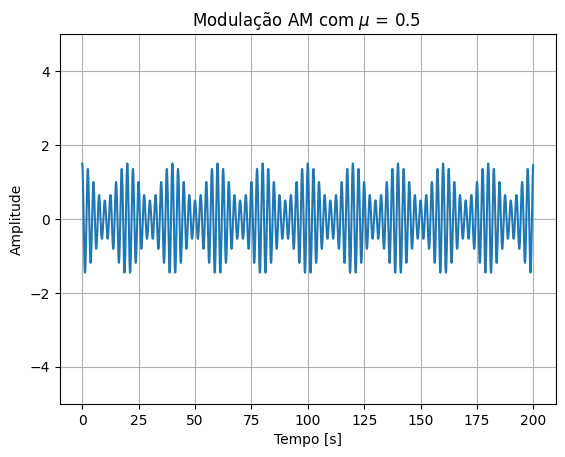

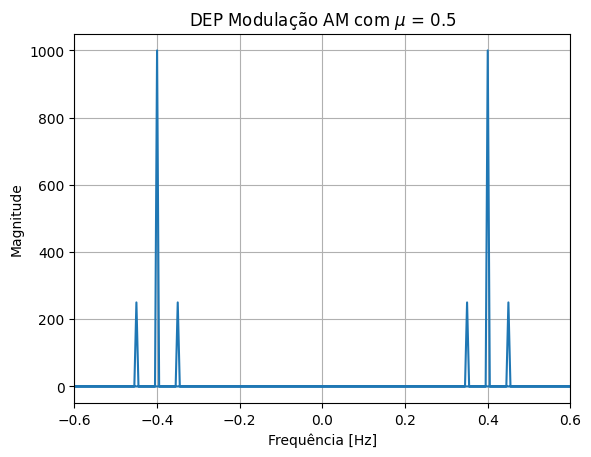

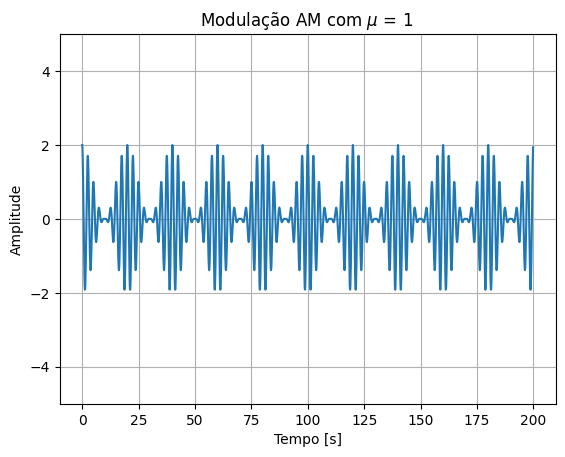

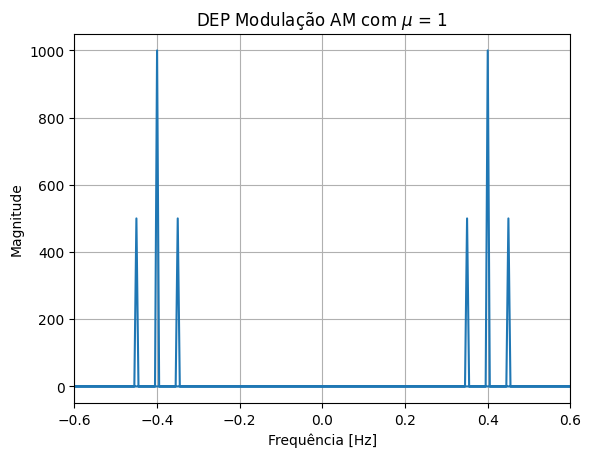

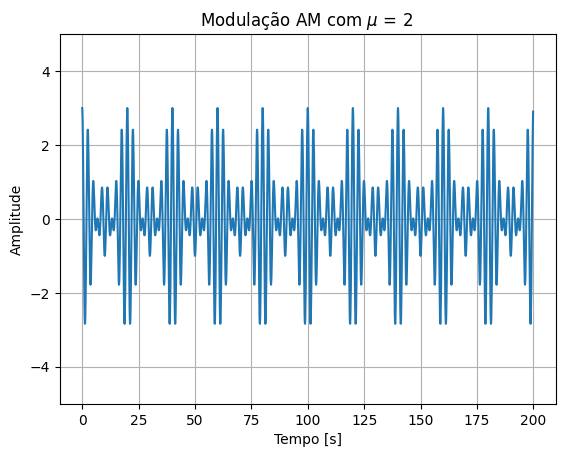

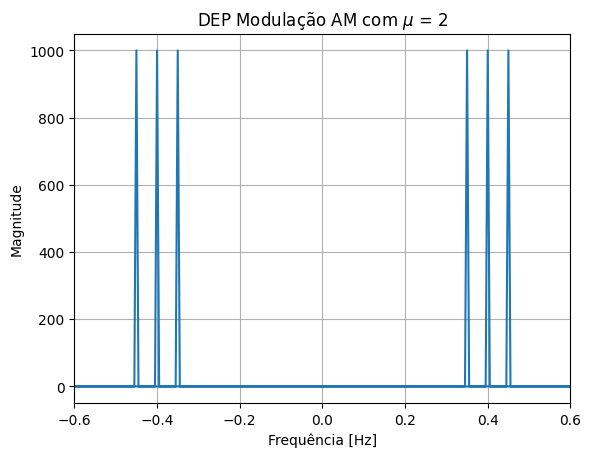

In [10]:
samples = 2000
ac = 1
fc = 0.4
fm = 0.05
fs = 10
k = [0.5, 1, 2]
m_t = 0
M = 2000

t = np.arange(samples)/fs

for k in k:
    m_t = np.cos(2*np.pi*fm*t)
    s_t1 = ac*(1 + k*m_t)*np.cos(2*np.pi*fc*t)
    plt.figure()
    plt.plot(t, s_t1)
    plt.title(f'Modulação AM com $\mu$ = {k} ')
    plt.xlabel('Tempo [s]')
    plt.ylabel('Amplitude')
    plt.ylim(-5,5)
    plt.grid()
    plt.show()

    fft_result = np.fft.fft(s_t1, M)
    fft_freq = np.fft.fftfreq(M, 1/fs)

    # Plotar espectro de frequência
    plt.figure()
    plt.plot(fft_freq, np.abs(fft_result))
    plt.title(f'DEP Modulação AM com $\mu$ = {k}')
    plt.xlabel('Frequência [Hz]')
    plt.ylabel('Magnitude')
    plt.xlim([-0.6, 0.6])  # Limitar faixa de frequência para -5Hz a 5Hz
    plt.grid(True)
    plt.show()





Fazendo agora para DSB-SC

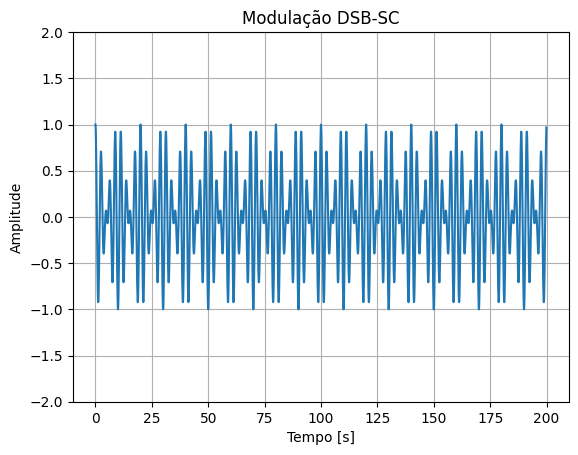

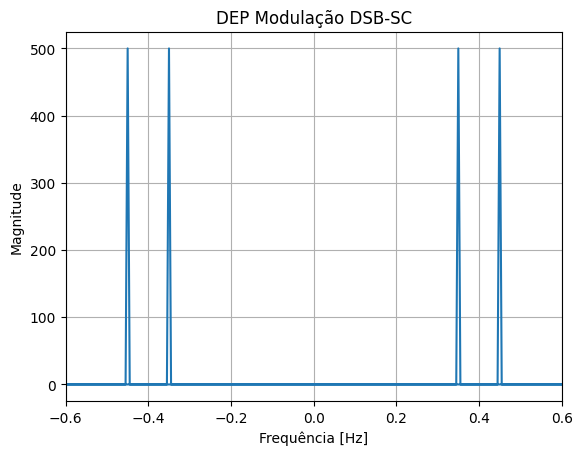

In [11]:
m_t = np.cos(2*np.pi*fm*t)
dsb_sc = ac*m_t*np.cos(2*np.pi*fc*t)
plt.figure()
plt.plot(t, dsb_sc)
plt.title('Modulação DSB-SC')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.ylim(-2,2)
plt.grid()
plt.show()

fft_result_dsb = np.fft.fft(dsb_sc, M)
fft_freq_dsb = np.fft.fftfreq(M, 1/fs)

# Plotar espectro de frequência
plt.figure()
plt.plot(fft_freq_dsb, np.abs(fft_result_dsb))
plt.title('DEP Modulação DSB-SC')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude')
plt.xlim([-0.6, 0.6])  # Limitar faixa de frequência para -5Hz a 5Hz
plt.grid(True)
plt.show()


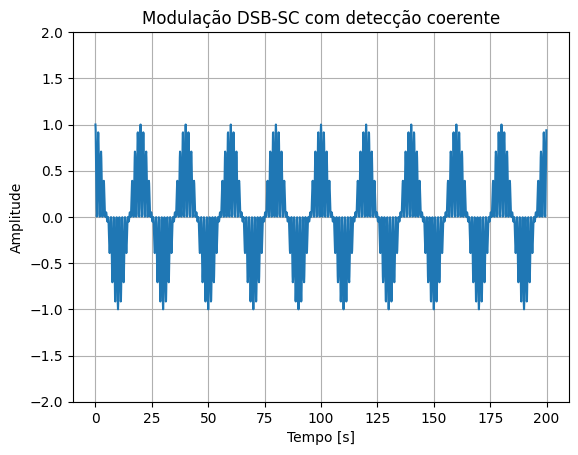

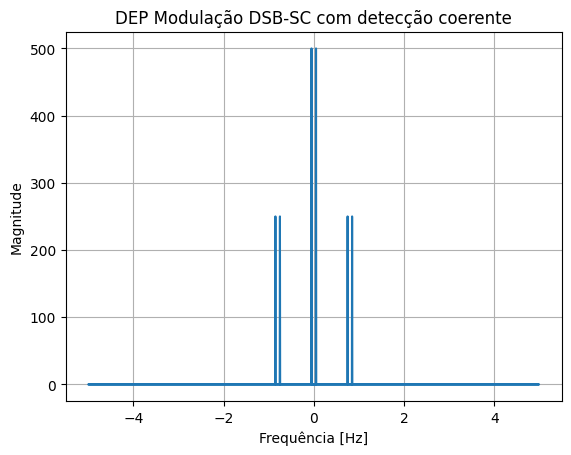

In [12]:
#Fazendo a detecção coerente do sinal DSB-SC
s_t2 = dsb_sc*np.cos(2*np.pi*fc*t)
plt.figure()
plt.plot(t, s_t2)
plt.title('Modulação DSB-SC com detecção coerente')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.ylim(-2,2)
plt.grid()
plt.show()

fft_result_dsbcoe = np.fft.fft(s_t2, M)
fft_freq_dsbcoe = np.fft.fftfreq(M, 1/fs)

# Plotar espectro de frequência
plt.figure()
plt.plot(fft_freq_dsbcoe, np.abs(fft_result_dsbcoe))
plt.title('DEP Modulação DSB-SC com detecção coerente')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

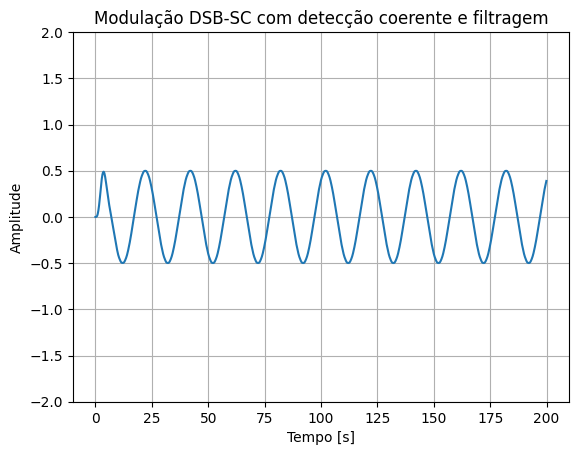

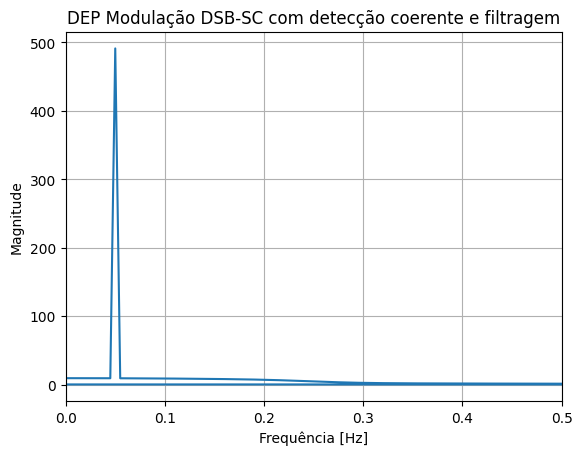

In [13]:
from scipy.signal import butter, lfilter

# Filtro passa-baixa

fc = 0.05  # Frequência de corte
b, a = butter(5, fc, 'low', analog=False)
s_t2_filtrado = lfilter(b, a, s_t2)

plt.figure()
plt.plot(t, s_t2_filtrado)
plt.title('Modulação DSB-SC com detecção coerente e filtragem')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.ylim(-2,2)
plt.grid()
plt.show()

fft_freq_dsb_dem = np.fft.fftfreq(M, 1/fs)
fft_result_dsb_dem = np.fft.fft(s_t2_filtrado, M)

# Plotar espectro de frequência
plt.figure()
plt.plot(fft_freq_dsb_dem, np.abs(fft_result_dsb_dem))
plt.title('DEP Modulação DSB-SC com detecção coerente e filtragem')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude')
plt.xlim([0, 0.5])
plt.grid(True)
plt.show()

Fazendo agora a modulação Single Side Band (SSB)